# Metric for defensive coordinators 

In [31]:
import scipy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import matplotlib.patches as patches
import seaborn as sns
import math
import pandas as pd

## Loading Data for pass play: Interception

In [32]:
tracking = pd.read_csv(r"/kaggle/input/nfl-big-data-bowl-2024/tracking_week_1.csv")

In [33]:
madden22 = pd.read_csv('/kaggle/input/madden22-roster/madden_nfl_22_final_roster.csv')

In [37]:
plays = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/plays.csv')

In [42]:
ballCarriers = plays[plays["passResult"] == 'C']

In [43]:
ballCarriers.head()

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle to P.Hesse to 50 for 9 yards (K.Neal).,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to LV 45 for 15 yards (N.Adderley).,2,2,5,LV,LAC,LV,30,8:57,10,3,C,11.0,NaN,15,15,N,40,I_FORM,6.0,0.267933,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
5,2022103001,2165,54616,Tyler Allgeier,(10:14) (Shotgun) M.Mariota pass short left to T.Allgeier to ATL 23 for 5 yards (D.Jackson).,3,3,17,ATL,CAR,ATL,18,10:14,14,13,C,-5.0,NaN,5,5,N,28,SHOTGUN,5.0,0.908870,0.599479,0.400521,-0.030628,0.030628,-1.484904,-0.639661,NaN,NaN,NaN,NaN
9,2022092511,2903,46096,Rashaad Penny,(:35) (Shotgun) G.Smith pass short left to R.Penny to SEA 28 for 3 yards (M.Walker).,3,1,10,SEA,ATL,SEA,25,0:35,23,27,C,-5.0,NaN,3,3,N,85,SHOTGUN,7.0,0.604374,0.344336,0.655664,-0.018103,0.018103,0.986438,-0.477845,NaN,NaN,NaN,NaN
12,2022091102,3336,46331,Ross Dwelley,(11:55) (Shotgun) T.Lance pass short middle to R.Dwelley to SF 36 for 11 yards (R.Smith).,4,3,10,SF,CHI,SF,25,11:55,13,10,C,11.0,NaN,11,11,N,35,SHOTGUN,6.0,0.976593,0.632420,0.367580,-0.085709,0.085709,-0.208933,1.777092,NaN,NaN,NaN,NaN


In [54]:
carrier1 = ballCarriers[(ballCarriers["playId"] == 56) & (ballCarriers["gameId"] == 2022090800)]


In [61]:
ballCarriers.rename(columns={'ballCarrierId': 'nflId'}, inplace=True)

/tmp/ipykernel_42/1766580784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ballCarriers.rename(columns={'ballCarrierId': 'nflId'}, inplace=True)


In [62]:
ballCarriers.head()

,gameId,playId,nflId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle to P.Hesse to 50 for 9 yards (K.Neal).,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to LV 45 for 15 yards (N.Adderley).,2,2,5,LV,LAC,LV,30,8:57,10,3,C,11.0,NaN,15,15,N,40,I_FORM,6.0,0.267933,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
5,2022103001,2165,54616,Tyler Allgeier,(10:14) (Shotgun) M.Mariota pass short left to T.Allgeier to ATL 23 for 5 yards (D.Jackson).,3,3,17,ATL,CAR,ATL,18,10:14,14,13,C,-5.0,NaN,5,5,N,28,SHOTGUN,5.0,0.908870,0.599479,0.400521,-0.030628,0.030628,-1.484904,-0.639661,NaN,NaN,NaN,NaN
9,2022092511,2903,46096,Rashaad Penny,(:35) (Shotgun) G.Smith pass short left to R.Penny to SEA 28 for 3 yards (M.Walker).,3,1,10,SEA,ATL,SEA,25,0:35,23,27,C,-5.0,NaN,3,3,N,85,SHOTGUN,7.0,0.604374,0.344336,0.655664,-0.018103,0.018103,0.986438,-0.477845,NaN,NaN,NaN,NaN
12,2022091102,3336,46331,Ross Dwelley,(11:55) (Shotgun) T.Lance pass short middle to R.Dwelley to SF 36 for 11 yards (R.Smith).,4,3,10,SF,CHI,SF,25,11:55,13,10,C,11.0,NaN,11,11,N,35,SHOTGUN,6.0,0.976593,0.632420,0.367580,-0.085709,0.085709,-0.208933,1.777092,NaN,NaN,NaN,NaN


In [59]:
carrier1.head()

,gameId,playId,nflId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
4889,2022090800,56,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to S.Diggs to BUF 31 for 6 yards (J.Ramsey).,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN


In [56]:
passCaught = tracking[tracking["event"] == "pass_outcome_caught"]


In [57]:
passCaught.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
5,2022090800,56,35472.0,Rodger Saffold,6,2022-09-08 20:24:05.700000,76.0,BUF,left,88.80,26.70,1.15,1.42,0.12,234.48,139.41,pass_outcome_caught
27,2022090800,56,38577.0,Bobby Wagner,6,2022-09-08 20:24:05.700000,45.0,LA,left,78.11,28.74,3.35,2.62,0.32,349.47,357.71,pass_outcome_caught
49,2022090800,56,41239.0,Aaron Donald,6,2022-09-08 20:24:05.700000,99.0,LA,left,92.15,29.96,3.62,2.86,0.37,186.16,157.65,pass_outcome_caught
71,2022090800,56,42392.0,Mitch Morse,6,2022-09-08 20:24:05.700000,60.0,BUF,left,88.21,29.31,1.42,0.64,0.14,282.32,347.15,pass_outcome_caught
93,2022090800,56,42489.0,Stefon Diggs,6,2022-09-08 20:24:05.700000,14.0,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,pass_outcome_caught


In [65]:
#passNew = passCaught.join(ballCarriers, on = ["gameId", "playId", "nflId"], how='left', rsuffix ='bc',)
passNew = passCaught.merge(ballCarriers, how = "left", on = ['gameId', 'playId', 'nflId'])

In [76]:
passNew.drop(columns=['quarter', 'down', 'yardsToGo', 'yardlineSide', 'yardlineNumber', 'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore', 'absoluteYardlineNumber', 'passProbability', 'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded', 'foulName1', 'foulName2', 'foulNFLId1', 'foulNFLId2'])

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierDisplayName,playDescription,possessionTeam,defensiveTeam,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,offenseFormation,defendersInTheBox
0,2022090800,56,35472.0,Rodger Saffold,6,2022-09-08 20:24:05.700000,76.0,BUF,left,88.800000,26.70,1.15,1.42,0.12,234.48,139.41,pass_outcome_caught,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022090800,56,38577.0,Bobby Wagner,6,2022-09-08 20:24:05.700000,45.0,LA,left,78.110000,28.74,3.35,2.62,0.32,349.47,357.71,pass_outcome_caught,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022090800,56,41239.0,Aaron Donald,6,2022-09-08 20:24:05.700000,99.0,LA,left,92.150000,29.96,3.62,2.86,0.37,186.16,157.65,pass_outcome_caught,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022090800,56,42392.0,Mitch Morse,6,2022-09-08 20:24:05.700000,60.0,BUF,left,88.210000,29.31,1.42,0.64,0.14,282.32,347.15,pass_outcome_caught,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022090800,56,42489.0,Stefon Diggs,6,2022-09-08 20:24:05.700000,14.0,BUF,left,79.850000,35.59,4.61,4.82,0.45,114.27,202.20,pass_outcome_caught,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to S.Diggs to BUF 31 for 6 yards (J.Ramsey).,BUF,LA,C,5.0,NaN,6.0,6.0,N,SHOTGUN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15865,2022091200,3826,52526.0,Albert Okwuegbunam,6,2022-09-12 23:05:53.500000,85.0,DEN,left,52.840000,30.37,1.80,0.97,0.18,143.23,173.54,pass_outcome_caught,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15866,2022091200,3826,53464.0,Javonte Williams,6,2022-09-12 23:05:53.500000,33.0,DEN,left,70.570000,11.96,3.91,2.22,0.39,313.03,192.49,pass_outcome_caught,Javonte Williams,(1:11) (Shotgun) R.Wilson pass short left to J.Williams to SEA 46 for 9 yards (J.Brooks).,DEN,SEA,C,-6.0,NaN,9.0,9.0,N,SHOTGUN,3.0
15867,2022091200,3826,54505.0,Boye Mafe,6,2022-09-12 23:05:53.500000,53.0,SEA,left,71.560000,25.09,4.80,3.11,0.47,183.52,187.27,pass_outcome_caught,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15868,2022091200,3826,54618.0,Tariq Woolen,6,2022-09-12 23:05:53.500000,27.0,SEA,left,51.220000,16.13,3.22,4.63,0.34,335.44,296.50,pass_outcome_caught,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
passNew.head(10)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022090800,56,35472.0,Rodger Saffold,6,2022-09-08 20:24:05.700000,76.0,BUF,left,88.80,26.70,1.15,1.42,0.12,234.48,139.41,pass_outcome_caught,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022090800,56,38577.0,Bobby Wagner,6,2022-09-08 20:24:05.700000,45.0,LA,left,78.11,28.74,3.35,2.62,0.32,349.47,357.71,pass_outcome_caught,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022090800,56,41239.0,Aaron Donald,6,2022-09-08 20:24:05.700000,99.0,LA,left,92.15,29.96,3.62,2.86,0.37,186.16,157.65,pass_outcome_caught,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022090800,56,42392.0,Mitch Morse,6,2022-09-08 20:24:05.700000,60.0,BUF,left,88.21,29.31,1.42,0.64,0.14,282.32,347.15,pass_outcome_caught,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022090800,56,42489.0,Stefon Diggs,6,2022-09-08 20:24:05.700000,14.0,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,pass_outcome_caught,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to S.Diggs to BUF 31 for 6 yards (J.Ramsey).,1.0,1.0,10.0,BUF,LA,BUF,25.0,15:00,0.0,0.0,C,5.0,NaN,6.0,6.0,N,85.0,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN
5,2022090800,56,42816.0,Troy Hill,6,2022-09-08 20:24:05.700000,2.0,LA,left,70.62,7.66,2.60,4.14,0.27,331.57,278.33,pass_outcome_caught,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022090800,56,43294.0,Jalen Ramsey,6,2022-09-08 20:24:05.700000,5.0,LA,left,78.15,37.85,5.88,1.23,0.59,140.96,178.50,pass_outcome_caught,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022090800,56,43298.0,Leonard Floyd,6,2022-09-08 20:24:05.700000,54.0,LA,left,92.11,33.14,1.34,2.21,0.13,159.12,203.53,pass_outcome_caught,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022090800,56,43335.0,A'Shawn Robinson,6,2022-09-08 20:24:05.700000,94.0,LA,left,88.41,25.65,0.92,2.38,0.09,1.82,270.65,pass_outcome_caught,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022090800,56,44875.0,Dion Dawkins,6,2022-09-08 20:24:05.700000,73.0,BUF,left,89.87,26.18,0.71,2.25,0.08,255.43,18.85,pass_outcome_caught,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 

In [74]:
ballCarriersXY = passNew[~passNew['ballCarrierDisplayName'].isna()]

In [77]:
ballCarriersXY.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
4,2022090800,56,42489.0,Stefon Diggs,6,2022-09-08 20:24:05.700000,14.0,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,pass_outcome_caught,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to S.Diggs to BUF 31 for 6 yards (J.Ramsey).,1.0,1.0,10.0,BUF,LA,BUF,25.0,15:00,0.0,0.0,C,5.0,NaN,6.0,6.0,N,85.0,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.004420,NaN,NaN,NaN,NaN
36,2022090800,122,47857.0,Devin Singletary,6,2022-09-08 20:25:51.500000,26.0,BUF,left,67.89,38.41,4.75,1.46,0.47,52.19,335.55,pass_outcome_caught,Devin Singletary,(13:15) (Shotgun) J.Allen pass short right to D.Singletary to LA 49 for 6 yards (B.Wagner).,1.0,2.0,3.0,BUF,LA,BUF,45.0,13:15,0.0,0.0,C,-3.0,NaN,6.0,6.0,N,65.0,SHOTGUN,6.0,0.686939,0.384969,0.615031,-0.019032,0.019032,2.689053,0.399209,NaN,NaN,NaN,NaN
50,2022090800,167,42489.0,Stefon Diggs,6,2022-09-08 20:27:10.900000,14.0,BUF,left,51.68,27.87,5.00,1.40,0.50,117.58,226.52,pass_outcome_caught,Stefon Diggs,(11:54) (Shotgun) J.Allen pass short middle to S.Diggs to LA 35 for 12 yards (L.Floyd).,1.0,2.0,8.0,BUF,LA,LA,47.0,11:54,0.0,0.0,C,6.0,NaN,12.0,12.0,N,57.0,EMPTY,6.0,0.903882,0.387554,0.612446,-0.031870,0.031870,2.574206,1.373441,NaN,NaN,NaN,NaN
87,2022090800,212,52494.0,Zack Moss,6,2022-09-08 20:28:26.200000,20.0,BUF,left,37.68,46.87,7.26,2.74,0.74,93.99,331.40,pass_outcome_caught,Zack Moss,(10:42) (Shotgun) J.Allen pass short right to Z.Moss to LA 26 for 8 yards (B.Wagner).,1.0,2.0,9.0,BUF,LA,LA,34.0,10:42,0.0,0.0,C,6.0,NaN,8.0,8.0,N,44.0,SHOTGUN,6.0,0.880736,0.359685,0.640315,-0.018238,0.018238,3.534322,0.547352,NaN,NaN,NaN,NaN
110,2022090800,236,52536.0,Gabe Davis,6,2022-09-08 20:29:04.500000,13.0,BUF,left,19.30,44.85,8.43,0.93,0.85,315.91,304.27,pass_outcome_caught,Gabe Davis,"(10:03) J.Allen pass short right to G.Davis for 26 yards, TOUCHDOWN.",1.0,3.0,1.0,BUF,LA,LA,26.0,10:03,0.0,0.0,C,15.0,NaN,26.0,26.0,N,36.0,I_FORM,7.0,0.225846,0.341447,0.658553,-0.063681,0.063681,4.081674,2.918326,NaN,NaN,NaN,NaN


In [78]:
ballCarriersXY = ballCarriersXY[['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'defensiveTeam', 'passLength', 'playResult']]

In [79]:
ballCarriersXY.head()

,gameId,playId,nflId,displayName,frameId,club,playDirection,x,y,s,a,dis,o,dir,defensiveTeam,passLength,playResult
4,2022090800,56,42489.0,Stefon Diggs,6,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0
36,2022090800,122,47857.0,Devin Singletary,6,BUF,left,67.89,38.41,4.75,1.46,0.47,52.19,335.55,LA,-3.0,6.0
50,2022090800,167,42489.0,Stefon Diggs,6,BUF,left,51.68,27.87,5.00,1.40,0.50,117.58,226.52,LA,6.0,12.0
87,2022090800,212,52494.0,Zack Moss,6,BUF,left,37.68,46.87,7.26,2.74,0.74,93.99,331.40,LA,6.0,8.0
110,2022090800,236,52536.0,Gabe Davis,6,BUF,left,19.30,44.85,8.43,0.93,0.85,315.91,304.27,LA,15.0,26.0


In [80]:
passCaught.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
5,2022090800,56,35472.0,Rodger Saffold,6,2022-09-08 20:24:05.700000,76.0,BUF,left,88.80,26.70,1.15,1.42,0.12,234.48,139.41,pass_outcome_caught
27,2022090800,56,38577.0,Bobby Wagner,6,2022-09-08 20:24:05.700000,45.0,LA,left,78.11,28.74,3.35,2.62,0.32,349.47,357.71,pass_outcome_caught
49,2022090800,56,41239.0,Aaron Donald,6,2022-09-08 20:24:05.700000,99.0,LA,left,92.15,29.96,3.62,2.86,0.37,186.16,157.65,pass_outcome_caught
71,2022090800,56,42392.0,Mitch Morse,6,2022-09-08 20:24:05.700000,60.0,BUF,left,88.21,29.31,1.42,0.64,0.14,282.32,347.15,pass_outcome_caught
93,2022090800,56,42489.0,Stefon Diggs,6,2022-09-08 20:24:05.700000,14.0,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,pass_outcome_caught


In [81]:
passFull = passCaught.merge(ballCarriersXY, how = "left", on = ['gameId', 'playId', 'frameId'], suffixes = (None, '_bc'))

In [84]:
passFull.head(30)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,nflId_bc,displayName_bc,club_bc,playDirection_bc,x_bc,y_bc,s_bc,a_bc,dis_bc,o_bc,dir_bc,defensiveTeam,passLength,playResult,distance
0,2022090800,56,35472.0,Rodger Saffold,6,2022-09-08 20:24:05.700000,76.0,BUF,left,88.800000,26.700000,1.15,1.420000,0.12,234.48,139.41,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,12.614856
1,2022090800,56,38577.0,Bobby Wagner,6,2022-09-08 20:24:05.700000,45.0,LA,left,78.110000,28.740000,3.35,2.620000,0.32,349.47,357.71,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,7.067538
2,2022090800,56,41239.0,Aaron Donald,6,2022-09-08 20:24:05.700000,99.0,LA,left,92.150000,29.960000,3.62,2.860000,0.37,186.16,157.65,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,13.527265
3,2022090800,56,42392.0,Mitch Morse,6,2022-09-08 20:24:05.700000,60.0,BUF,left,88.210000,29.310000,1.42,0.640000,0.14,282.32,347.15,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,10.456003
4,2022090800,56,42489.0,Stefon Diggs,6,2022-09-08 20:24:05.700000,14.0,BUF,left,79.850000,35.590000,4.61,4.820000,0.45,114.27,202.20,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,0.000000
5,2022090800,56,42816.0,Troy Hill,6,2022-09-08 20:24:05.700000,2.0,LA,left,70.620000,7.660000,2.60,4.140000,0.27,331.57,278.33,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,29.415605
6,2022090800,56,43294.0,Jalen Ramsey,6,2022-09-08 20:24:05.700000,5.0,LA,left,78.150000,37.850000,5.88,1.230000,0.59,140.96,178.50,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,2.828003
7,2022090800,56,43298.0,Leonard Floyd,6,2022-09-08 20:24:05.700000,54.0,LA,left,92.110000,33.140000,1.34,2.210000,0.13,159.12,203.53,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,12.502404
8,2022090800,56,43335.0,A'Shawn Robinson,6,2022-09-08 20:24:05.700000,94.0,LA,left,88.410000,25.650000,0.92,2.380000,0.09,1.82,270.65,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,13.117820
9,2022090800,56,44875.0,Dion Dawkins,6,2022-09-08 20:24:05.700000,73.0,BUF,left,89.870000,26.180000,0.71,2.250000,0.08,255.43,18.85,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,13.745854


## Need to add distance to ball carrier, if within tackle zone, if blocker or tackler

In [83]:
passFull['distance'] = np.sqrt((passFull["x_bc"] - passFull["x"])**2 + (passFull["y_bc"] - passFull["y"])**2)

In [3]:
passFull.to_csv('pass_full.csv')

NameError: name 'passFull' is not defined

In [5]:
games = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/games.csv')

In [6]:
games_hv = games[['gameId', 'homeTeamAbbr', 'visitorTeamAbbr']]

In [6]:
games_hv.head()

,gameId,homeTeamAbbr,visitorTeamAbbr
0,2022090800,LA,BUF
1,2022091100,ATL,NO
2,2022091101,CAR,CLE
3,2022091102,CHI,SF
4,2022091103,CIN,PIT


In [4]:
passFull = pd.read_csv("/kaggle/input/pass-full/pass_full.csv")

In [8]:
passFull = passFull.merge(games_hv, how = "left", on = ['gameId'])

In [9]:
passFull.drop(passFull.columns[0], axis=1, inplace = True)

In [10]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 1000);
pd.set_option('display.max_rows', 1000);
passFull.head(30)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,nflId_bc,displayName_bc,club_bc,playDirection_bc,x_bc,y_bc,s_bc,a_bc,dis_bc,o_bc,dir_bc,defensiveTeam,passLength,playResult,distance,homeTeamAbbr,visitorTeamAbbr
0,2022090800,56,35472.0,Rodger Saffold,6,2022-09-08 20:24:05.700000,76.0,BUF,left,88.800000,26.700000,1.15,1.420000,0.12,234.48,139.41,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,12.614856,LA,BUF
1,2022090800,56,38577.0,Bobby Wagner,6,2022-09-08 20:24:05.700000,45.0,LA,left,78.110000,28.740000,3.35,2.620000,0.32,349.47,357.71,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,7.067538,LA,BUF
2,2022090800,56,41239.0,Aaron Donald,6,2022-09-08 20:24:05.700000,99.0,LA,left,92.150000,29.960000,3.62,2.860000,0.37,186.16,157.65,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,13.527265,LA,BUF
3,2022090800,56,42392.0,Mitch Morse,6,2022-09-08 20:24:05.700000,60.0,BUF,left,88.210000,29.310000,1.42,0.640000,0.14,282.32,347.15,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,10.456003,LA,BUF
4,2022090800,56,42489.0,Stefon Diggs,6,2022-09-08 20:24:05.700000,14.0,BUF,left,79.850000,35.590000,4.61,4.820000,0.45,114.27,202.20,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,0.000000,LA,BUF
5,2022090800,56,42816.0,Troy Hill,6,2022-09-08 20:24:05.700000,2.0,LA,left,70.620000,7.660000,2.60,4.140000,0.27,331.57,278.33,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,29.415605,LA,BUF
6,2022090800,56,43294.0,Jalen Ramsey,6,2022-09-08 20:24:05.700000,5.0,LA,left,78.150000,37.850000,5.88,1.230000,0.59,140.96,178.50,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,2.828003,LA,BUF
7,2022090800,56,43298.0,Leonard Floyd,6,2022-09-08 20:24:05.700000,54.0,LA,left,92.110000,33.140000,1.34,2.210000,0.13,159.12,203.53,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,12.502404,LA,BUF
8,2022090800,56,43335.0,A'Shawn Robinson,6,2022-09-08 20:24:05.700000,94.0,LA,left,88.410000,25.650000,0.92,2.380000,0.09,1.82,270.65,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,13.117820,LA,BUF
9,2022090800,56,44875.0,Dion Dawkins,6,2022-09-08 20:24:05.700000,73.0,BUF,left,89.870000,26.180000,0.71,2.250000,0.08,255.43,18.85,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,13.745854,LA,BUF


## Find if player is behind (-) or ahead (+) of ball carrier and add sign 

In [11]:
passFull['type'] =  passFull.apply(lambda row: 'defender' if row['club'] != row['club_bc'] else ('ball_carrier' if row['nflId'] == row['nflId_bc'] else 'blocker') , axis=1)

In [12]:
passFull.head(10)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,nflId_bc,displayName_bc,club_bc,playDirection_bc,x_bc,y_bc,s_bc,a_bc,dis_bc,o_bc,dir_bc,defensiveTeam,passLength,playResult,distance,homeTeamAbbr,visitorTeamAbbr,type
0,2022090800,56,35472.0,Rodger Saffold,6,2022-09-08 20:24:05.700000,76.0,BUF,left,88.80,26.70,1.15,1.42,0.12,234.48,139.41,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.2,LA,5.0,6.0,12.614856,LA,BUF,blocker
1,2022090800,56,38577.0,Bobby Wagner,6,2022-09-08 20:24:05.700000,45.0,LA,left,78.11,28.74,3.35,2.62,0.32,349.47,357.71,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.2,LA,5.0,6.0,7.067538,LA,BUF,defender
2,2022090800,56,41239.0,Aaron Donald,6,2022-09-08 20:24:05.700000,99.0,LA,left,92.15,29.96,3.62,2.86,0.37,186.16,157.65,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.2,LA,5.0,6.0,13.527265,LA,BUF,defender
3,2022090800,56,42392.0,Mitch Morse,6,2022-09-08 20:24:05.700000,60.0,BUF,left,88.21,29.31,1.42,0.64,0.14,282.32,347.15,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.2,LA,5.0,6.0,10.456003,LA,BUF,blocker
4,2022090800,56,42489.0,Stefon Diggs,6,2022-09-08 20:24:05.700000,14.0,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.2,LA,5.0,6.0,0.000000,LA,BUF,ball_carrier
5,2022090800,56,42816.0,Troy Hill,6,2022-09-08 20:24:05.700000,2.0,LA,left,70.62,7.66,2.60,4.14,0.27,331.57,278.33,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.2,LA,5.0,6.0,29.415605,LA,BUF,defender
6,2022090800,56,43294.0,Jalen Ramsey,6,2022-09-08 20:24:05.700000,5.0,LA,left,78.15,37.85,5.88,1.23,0.59,140.96,178.50,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.2,LA,5.0,6.0,2.828003,LA,BUF,defender
7,2022090800,56,43298.0,Leonard Floyd,6,2022-09-08 20:24:05.700000,54.0,LA,left,92.11,33.14,1.34,2.21,0.13,159.12,203.53,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.2,LA,5.0,6.0,12.502404,LA,BUF,defender
8,2022090800,56,43335.0,A'Shawn Robinson,6,2022-09-08 20:24:05.700000,94.0,LA,left,88.41,25.65,0.92,2.38,0.09,1.82,270.65,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.2,LA,5.0,6.0,13.117820,LA,BUF,defender
9,2022090800,56,44875.0,Dion Dawkins,6,2022-09-08 20:24:05.700000,73.0,BUF,left,89.87,26.18,0.71,2.25,0.08,255.43,18.85,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.2,LA,5.0,6.0,13.745854,LA,BUF,blocker


In [13]:
passFull['relative_position'] = passFull.apply(lambda row: 'ahead' if ((row['playDirection'] == 'right' and row['x_bc'] < row['x']) or (row['playDirection'] == 'left' and row['x_bc'] > row['x'])) else 'behind', axis=1)


In [14]:
passFull.head(30)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,nflId_bc,displayName_bc,club_bc,playDirection_bc,x_bc,y_bc,s_bc,a_bc,dis_bc,o_bc,dir_bc,defensiveTeam,passLength,playResult,distance,homeTeamAbbr,visitorTeamAbbr,type,relative_position
0,2022090800,56,35472.0,Rodger Saffold,6,2022-09-08 20:24:05.700000,76.0,BUF,left,88.800000,26.700000,1.15,1.420000,0.12,234.48,139.41,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,12.614856,LA,BUF,blocker,behind
1,2022090800,56,38577.0,Bobby Wagner,6,2022-09-08 20:24:05.700000,45.0,LA,left,78.110000,28.740000,3.35,2.620000,0.32,349.47,357.71,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,7.067538,LA,BUF,defender,ahead
2,2022090800,56,41239.0,Aaron Donald,6,2022-09-08 20:24:05.700000,99.0,LA,left,92.150000,29.960000,3.62,2.860000,0.37,186.16,157.65,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,13.527265,LA,BUF,defender,behind
3,2022090800,56,42392.0,Mitch Morse,6,2022-09-08 20:24:05.700000,60.0,BUF,left,88.210000,29.310000,1.42,0.640000,0.14,282.32,347.15,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,10.456003,LA,BUF,blocker,behind
4,2022090800,56,42489.0,Stefon Diggs,6,2022-09-08 20:24:05.700000,14.0,BUF,left,79.850000,35.590000,4.61,4.820000,0.45,114.27,202.20,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,0.000000,LA,BUF,ball_carrier,behind
5,2022090800,56,42816.0,Troy Hill,6,2022-09-08 20:24:05.700000,2.0,LA,left,70.620000,7.660000,2.60,4.140000,0.27,331.57,278.33,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,29.415605,LA,BUF,defender,ahead
6,2022090800,56,43294.0,Jalen Ramsey,6,2022-09-08 20:24:05.700000,5.0,LA,left,78.150000,37.850000,5.88,1.230000,0.59,140.96,178.50,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,2.828003,LA,BUF,defender,ahead
7,2022090800,56,43298.0,Leonard Floyd,6,2022-09-08 20:24:05.700000,54.0,LA,left,92.110000,33.140000,1.34,2.210000,0.13,159.12,203.53,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,12.502404,LA,BUF,defender,behind
8,2022090800,56,43335.0,A'Shawn Robinson,6,2022-09-08 20:24:05.700000,94.0,LA,left,88.410000,25.650000,0.92,2.380000,0.09,1.82,270.65,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,13.117820,LA,BUF,defender,behind
9,2022090800,56,44875.0,Dion Dawkins,6,2022-09-08 20:24:05.700000,73.0,BUF,left,89.870000,26.180000,0.71,2.250000,0.08,255.43,18.85,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,13.745854,LA,BUF,blocker,behind


## Tackle zone calculation

In [22]:
#passFull['tackleZone'] = passFull.apply(lambda row: 'defender' if , axis=1)
passFull['tackleZone_5to10'] = passFull.apply(lambda row: 1 if ((row['relative_position'] == 'behind' and row['distance'] <= 5) or (row['relative_position'] == 'ahead' and row['distance'] <= 10)) else 0, axis=1)

In [24]:
passFull['tackleZone_3to7'] = passFull.apply(lambda row: 1 if ((row['relative_position'] == 'behind' and row['distance'] <= 3) or (row['relative_position'] == 'ahead' and row['distance'] <= 7)) else 0, axis=1)

In [25]:
passFull['tackleZone_2to5'] = passFull.apply(lambda row: 1 if ((row['relative_position'] == 'behind' and row['distance'] <= 2) or (row['relative_position'] == 'ahead' and row['distance'] <= 5)) else 0, axis=1)

In [26]:
passFull['tackleZone_1to3'] = passFull.apply(lambda row: 1 if ((row['relative_position'] == 'behind' and row['distance'] <= 1) or (row['relative_position'] == 'ahead' and row['distance'] <= 3)) else 0, axis=1)

In [32]:
passFull.head(45)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,nflId_bc,displayName_bc,club_bc,playDirection_bc,x_bc,y_bc,s_bc,a_bc,dis_bc,o_bc,dir_bc,defensiveTeam,passLength,playResult,distance,homeTeamAbbr,visitorTeamAbbr,type,relative_position,tackleZone_5to10,tackleZone_3to7,tackleZone_2to5,tackleZone_1to3,YAC
0,2022090800,56,35472.0,Rodger Saffold,6,2022-09-08 20:24:05.700000,76.0,BUF,left,88.800000,26.700000,1.15,1.420000,0.12,234.48,139.41,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,12.614856,LA,BUF,blocker,behind,0,0,0,0,1.0
1,2022090800,56,38577.0,Bobby Wagner,6,2022-09-08 20:24:05.700000,45.0,LA,left,78.110000,28.740000,3.35,2.620000,0.32,349.47,357.71,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,7.067538,LA,BUF,defender,ahead,1,0,0,0,1.0
2,2022090800,56,41239.0,Aaron Donald,6,2022-09-08 20:24:05.700000,99.0,LA,left,92.150000,29.960000,3.62,2.860000,0.37,186.16,157.65,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,13.527265,LA,BUF,defender,behind,0,0,0,0,1.0
3,2022090800,56,42392.0,Mitch Morse,6,2022-09-08 20:24:05.700000,60.0,BUF,left,88.210000,29.310000,1.42,0.640000,0.14,282.32,347.15,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,10.456003,LA,BUF,blocker,behind,0,0,0,0,1.0
4,2022090800,56,42489.0,Stefon Diggs,6,2022-09-08 20:24:05.700000,14.0,BUF,left,79.850000,35.590000,4.61,4.820000,0.45,114.27,202.20,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,0.000000,LA,BUF,ball_carrier,behind,1,1,1,1,1.0
5,2022090800,56,42816.0,Troy Hill,6,2022-09-08 20:24:05.700000,2.0,LA,left,70.620000,7.660000,2.60,4.140000,0.27,331.57,278.33,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,29.415605,LA,BUF,defender,ahead,0,0,0,0,1.0
6,2022090800,56,43294.0,Jalen Ramsey,6,2022-09-08 20:24:05.700000,5.0,LA,left,78.150000,37.850000,5.88,1.230000,0.59,140.96,178.50,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,2.828003,LA,BUF,defender,ahead,1,1,1,1,1.0
7,2022090800,56,43298.0,Leonard Floyd,6,2022-09-08 20:24:05.700000,54.0,LA,left,92.110000,33.140000,1.34,2.210000,0.13,159.12,203.53,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,12.502404,LA,BUF,defender,behind,0,0,0,0,1.0
8,2022090800,56,43335.0,A'Shawn Robinson,6,2022-09-08 20:24:05.700000,94.0,LA,left,88.410000,25.650000,0.92,2.380000,0.09,1.82,270.65,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,13.117820,LA,BUF,defender,behind,0,0,0,0,1.0
9,2022090800,56,44875.0,Dion Dawkins,6,2022-09-08 20:24:05.700000,73.0,BUF,left,89.870000,26.180000,0.71,2.250000,0.08,255.43,18.85,pass_outcome_caught,42489.0,Stefon Diggs,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,LA,5.0,6.0,13.745854,LA,BUF,blocker,behind,0,0,0,0,1.0


In [20]:
passFull['YAC'] = passFull['playResult']-passFull['passLength']

In [28]:
passFull.to_csv('pass_full.csv')

In [29]:
playSummary = passFull[passFull['type'] == 'blocker'].groupby(['gameId', 'playId']).sum().reset_index()

In [31]:
playSummary.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,nflId_bc,displayName_bc,club_bc,playDirection_bc,x_bc,y_bc,s_bc,a_bc,dis_bc,o_bc,dir_bc,defensiveTeam,passLength,playResult,distance,homeTeamAbbr,visitorTeamAbbr,type,relative_position,tackleZone_5to10,tackleZone_3to7,tackleZone_2to5,tackleZone_1to3,YAC
0,2022090800,56,464106.0,Rodger SaffoldMitch MorseDion DawkinsIsaiah McKenzieJosh AllenDevin SingletaryDawson KnoxRyan BatesGabe DavisSpencer Brown,60,2022-09-08 20:24:05.7000002022-09-08 20:24:05.7000002022-09-08 20:24:05.7000002022-09-08 20:24:05.7000002022-09-08 20:24:05.7000002022-09-08 20:24:05.7000002022-09-08 20:24:05.7000002022-09-08 20:24:05.7000002022-09-08 20:24:05.7000002022-09-08 20:24:05.700000,509.0,BUFBUFBUFBUFBUFBUFBUFBUFBUFBUF,leftleftleftleftleftleftleftleftleftleft,849.23,251.63,28.09,20.59,2.83,2174.44,1861.25,pass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caught,424890.0,Stefon DiggsStefon DiggsStefon DiggsStefon DiggsStefon DiggsStefon DiggsStefon DiggsStefon DiggsStefon DiggsStefon Diggs,BUFBUFBUFBUFBUFBUFBUFBUFBUFBUF,leftleftleftleftleftleftleftleftleftleft,798.5,355.9,46.1,48.2,4.5,1142.7,2022.0,LALALALALALALALALALA,50.0,60.0,146.340385,LALALALALALALALALALA,BUFBUFBUFBUFBUFBUFBUFBUFBUFBUF,blockerblockerblockerblockerblockerblockerblockerblockerblockerblocker,behindbehindbehindaheadbehindbehindaheadbehindaheadbehind,1,0,0,0,10.0
1,2022090800,122,458738.0,Rodger SaffoldMitch MorseStefon DiggsDion DawkinsIsaiah McKenzieJosh AllenDawson KnoxRyan BatesGabe DavisSpencer Brown,60,2022-09-08 20:25:51.5000002022-09-08 20:25:51.5000002022-09-08 20:25:51.5000002022-09-08 20:25:51.5000002022-09-08 20:25:51.5000002022-09-08 20:25:51.5000002022-09-08 20:25:51.5000002022-09-08 20:25:51.5000002022-09-08 20:25:51.5000002022-09-08 20:25:51.500000,497.0,BUFBUFBUFBUFBUFBUFBUFBUFBUFBUF,leftleftleftleftleftleftleftleftleftleft,644.84,298.26,35.01,16.20,3.53,1949.05,1958.17,pass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caught,478570.0,Devin SingletaryDevin SingletaryDevin SingletaryDevin SingletaryDevin SingletaryDevin SingletaryDevin SingletaryDevin SingletaryDevin SingletaryDevin Singletary,BUFBUFBUFBUFBUFBUFBUFBUFBUFBUF,leftleftleftleftleftleftleftleftleftleft,678.9,384.1,47.5,14.6,4.7,521.9,3355.5,LALALALALALALALALALA,-30.0,60.0,136.537212,LALALALALALALALALALA,BUFBUFBUFBUFBUFBUFBUFBUFBUFBUF,blockerblockerblockerblockerblockerblockerblockerblockerblockerblocker,behindbehindaheadbehindaheadbehindbehindbehindaheadbehind,0,0,0,0,90.0
2,2022090800,167,468743.0,Rodger SaffoldMitch MorseDion DawkinsIsaiah McKenzieJosh AllenDawson KnoxRyan BatesZack MossGabe DavisSpencer Brown,60,2022-09-08 20:27:10.9000002022-09-08 20:27:10.9000002022-09-08 20:27:10.9000002022-09-08 20:27:10.9000002022-09-08 20:27:10.9000002022-09-08 20:27:10.9000002022-09-08 20:27:10.9000002022-09-08 20:27:10.9000002022-09-08 20:27:10.9000002022-09-08 20:27:10.900000,503.0,BUFBUFBUFBUFBUFBUFBUFBUFBUFBUF,leftleftleftleftleftleftleftleftleftleft,585.89,266.86,24.32,22.53,2.42,2577.19,2059.16,pass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caughtpass_outcome_caught,424890.0,Stefon DiggsStefon DiggsStefon DiggsStefon DiggsStefon DiggsStefon DiggsStefon DiggsStefon DiggsStefon DiggsStefon Diggs,BUFBUFBUFBUFBUFBUFBUFBUFBUFBUF,leftleftleftleftleftleftleftleftleftleft,516.8,278.7,50.0,14.0,5.0,1175.8,2265.2,LALALALALALALALALALA,60.0,120.0,132.508293,LALALALALALALALALALA,BUFBUFBUFBUFBUFBUFBUFBUFBUFBUF,blockerblockerblockerblockerblockerblockerblockerblockerblockerblocker,behindbehindbehindbehindbehindaheadbehindbehindaheadbehind,0,0,0,

In [33]:
playSummaryBlockers = playSummary[['gameId', 'playId', 'tackleZone_5to10', 'tackleZone_3to7', 'tackleZone_2to5', 'tackleZone_1to3']]

In [ ]:
playSummaryBlockers.head()

In [35]:
playSummary = passFull[passFull['type'] == 'defender'].groupby(['gameId', 'playId']).sum().reset_index()

In [36]:
playSummaryDefenders = playSummary[['gameId', 'playId', 'tackleZone_5to10', 'tackleZone_3to7', 'tackleZone_2to5', 'tackleZone_1to3']]

In [37]:
playSummaryDefenders.head()

,gameId,playId,tackleZone_5to10,tackleZone_3to7,tackleZone_2to5,tackleZone_1to3
0,2022090800,56,4,3,3,2
1,2022090800,122,4,1,1,1
2,2022090800,167,4,2,2,2
3,2022090800,212,2,2,2,2
4,2022090800,236,2,1,1,1


In [16]:
plays = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/plays.csv')

In [39]:
playSubset = plays[['gameId', 'playId', 'passLength', 'playResult', 'offenseFormation', 'defendersInTheBox']]

In [41]:
playSubset.head()

,gameId,playId,passLength,playResult,offenseFormation,defendersInTheBox
0,2022100908,3537,6.0,9,SHOTGUN,7.0
1,2022091103,3126,NaN,3,SHOTGUN,7.0
2,2022091111,1148,11.0,15,I_FORM,6.0
3,2022100212,2007,NaN,7,SINGLEBACK,6.0
4,2022091900,1372,NaN,3,I_FORM,7.0


In [42]:
 playSummary = playSubset.merge(playSummaryDefenders, how = "inner", on = ['gameId', 'playId'], suffixes = (None, '_dfd'))

In [43]:
playSummary = playSummary.merge(playSummaryBlockers, how = "inner", on = ['gameId', 'playId'], suffixes = (None, '_blck'))

In [11]:
playSummary.head()

,Unnamed: 0,gameId,playId,passLength,playResult,offenseFormation,defendersInTheBox,tackleZone_5to10,tackleZone_3to7,tackleZone_2to5,tackleZone_1to3,tackleZone_5to10_blck,tackleZone_3to7_blck,tackleZone_2to5_blck,tackleZone_1to3_blck,YAC
0,0,2022091111,1148,11.0,15,I_FORM,6.0,3,3,2,1,0,0,0,0,4.0
1,1,2022091102,3336,11.0,11,SHOTGUN,6.0,5,4,4,3,1,0,0,0,0.0
2,2,2022091109,1705,2.0,8,SINGLEBACK,7.0,2,1,1,1,0,0,0,0,6.0
3,3,2022091100,1887,18.0,31,SHOTGUN,5.0,4,3,2,2,1,1,0,0,13.0
4,4,2022091104,865,15.0,18,SHOTGUN,6.0,3,3,1,1,0,0,0,0,3.0


In [19]:
playSummary['YAC'] = playSummary['playResult']- playSummary['passLength']

In [59]:
playSummary.to_csv('playSummary.csv')

In [41]:
playSummary = pd.read_csv('/kaggle/input/playsummary/playSummary.csv')

In [42]:
playSummary.drop(playSummary.columns[0], axis=1, inplace = True)

In [43]:
plays.head()

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [44]:
playsSubset = plays[['gameId', 'playId', 'prePenaltyPlayResult']]
playsSubset.head()

,gameId,playId,prePenaltyPlayResult
0,2022100908,3537,9
1,2022091103,3126,3
2,2022091111,1148,15
3,2022100212,2007,7
4,2022091900,1372,3


In [45]:
playSummary = playSummary.merge(playsSubset, how = "inner", on = ['gameId', 'playId'])

In [47]:
#playSummary.drop(playSummary.columns[3], axis=1, inplace = True)

In [50]:
playSummary.head()

,gameId,playId,passLength,offenseFormation,defendersInTheBox,tackleZone_5to10,tackleZone_3to7,tackleZone_2to5,tackleZone_1to3,tackleZone_5to10_blck,tackleZone_3to7_blck,tackleZone_2to5_blck,tackleZone_1to3_blck,YAC,prePenaltyPlayResult
0,2022091111,1148,11.0,I_FORM,6.0,3,3,2,1,0,0,0,0,4.0,15
1,2022091102,3336,11.0,SHOTGUN,6.0,5,4,4,3,1,0,0,0,0.0,11
2,2022091109,1705,2.0,SINGLEBACK,7.0,2,1,1,1,0,0,0,0,6.0,8
3,2022091100,1887,18.0,SHOTGUN,5.0,4,3,2,2,1,1,0,0,13.0,31
4,2022091104,865,15.0,SHOTGUN,6.0,3,3,1,1,0,0,0,0,3.0,18


In [49]:
playSummary['YAC'] = playSummary['prePenaltyPlayResult']- playSummary['passLength']

In [51]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

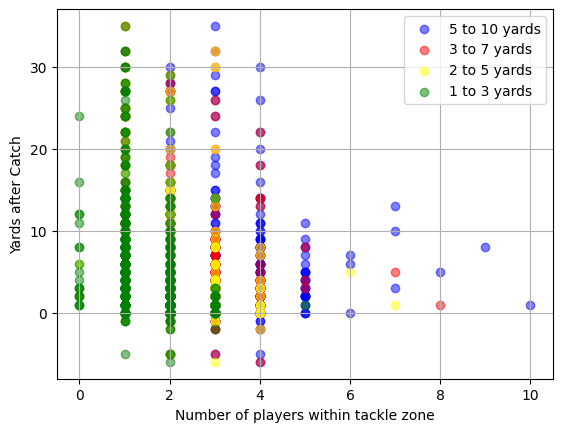

In [58]:
plt.scatter(playSummary['tackleZone_5to10'], playSummary['YAC'], color="blue", alpha =0.5, label='5 to 10 yards')
plt.scatter(playSummary['tackleZone_3to7'], playSummary['YAC'], color="red", alpha =0.5, label='3 to 7 yards')
plt.scatter(playSummary['tackleZone_2to5'], playSummary['YAC'], color="yellow", alpha =0.5, label='2 to 5 yards')
plt.scatter(playSummary['tackleZone_1to3'], playSummary['YAC'], color="green", alpha =0.5, label='1 to 3 yards')

plt.xlabel('Number of players within tackle zone')
plt.ylabel('Yards after Catch')
plt.grid(True)
plt.legend()
plt.show()

In [60]:
avgYAC_zone1to3 = playSummary.groupby('tackleZone_1to3')['YAC'].mean().reset_index()
avgYAC_zone2to5 = playSummary.groupby('tackleZone_2to5')['YAC'].mean().reset_index()
avgYAC_zone3to7 = playSummary.groupby('tackleZone_3to7')['YAC'].mean().reset_index()
avgYAC_zone5to10 = playSummary.groupby('tackleZone_5to10')['YAC'].mean().reset_index()

In [74]:
avgYAC_zone2to5.head()

,tackleZone_2to5,YAC
0,0,3.333333
1,1,9.252475
2,2,3.881402
3,3,2.833333
4,4,2.000000


In [75]:
avgYAC = avgYAC_zone1to3.merge(avgYAC_zone2to5, how='outer', left_on='tackleZone_1to3', right_on='tackleZone_2to5', suffixes=('_1to3', '_3to5'))

In [93]:
avgYAC.head(30)

,tackleZone_1to3,YAC_1to3,tackleZone_2to5,YAC_2to5,numDefenders,tackleZone_3to7,YAC_3to7,tackleZone_5to10,YAC_5to10
0,0.0,6.526316,0.0,3.333333,0.0,NaN,NaN,NaN,NaN
1,1.0,7.395095,1.0,9.252475,1.0,1.0,11.524752,1.0,13.068966
2,2.0,2.756458,2.0,3.881402,2.0,2.0,4.694444,2.0,5.854545
3,3.0,1.300000,3.0,2.833333,3.0,3.0,3.288889,3.0,4.564885
4,5.0,1.000000,NaN,NaN,5.0,5.0,5.000000,5.0,3.766667
5,NaN,NaN,4.0,2.000000,4.0,4.0,3.761905,4.0,4.318841
6,NaN,NaN,6.0,5.000000,6.0,NaN,NaN,6.0,4.333333
7,NaN,NaN,7.0,1.000000,7.0,7.0,5.000000,7.0,8.666667
8,NaN,NaN,NaN,NaN,8.0,8.0,1.000000,8.0,5.000000
9,NaN,NaN,NaN,NaN,9.0,NaN,NaN,9.0,8.000000


In [79]:
avgYAC['numDefenders'] = avgYAC[['tackleZone_1to3', 'tackleZone_2to5']].max(axis=1)

In [81]:
avgYAC = avgYAC.merge(avgYAC_zone3to7, how='outer', left_on='numDefenders', right_on='tackleZone_3to7', suffixes=('_1to5', '_3to7'))

In [90]:
avgYAC['numDefenders'] = avgYAC[['numDefenders', 'tackleZone_5to10']].max(axis=1)

In [92]:
avgYAC = avgYAC.rename(columns={'YAC': 'YAC_5to10'})

In [88]:
avgYAC = avgYAC.merge(avgYAC_zone5to10, how='outer', left_on='numDefenders', right_on='tackleZone_5to10', suffixes=('_all', '5_to10'))

In [99]:
avgYAC.drop('tackleZone_5to10', axis=1, inplace = True)
avgYAC.head()

,YAC_1to3,YAC_2to5,numDefenders,YAC_3to7,YAC_5to10
0,6.526316,3.333333,0.0,NaN,NaN
1,7.395095,9.252475,1.0,11.524752,13.068966
2,2.756458,3.881402,2.0,4.694444,5.854545
3,1.300000,2.833333,3.0,3.288889,4.564885
4,1.000000,NaN,5.0,5.000000,3.766667


In [103]:
avgYAC.head(30)

,YAC_1to3,YAC_2to5,numDefenders,YAC_3to7,YAC_5to10
0,6.526316,3.333333,0.0,NaN,NaN
1,7.395095,9.252475,1.0,11.524752,13.068966
2,2.756458,3.881402,2.0,4.694444,5.854545
3,1.300000,2.833333,3.0,3.288889,4.564885
4,1.000000,NaN,5.0,5.000000,3.766667
5,NaN,2.000000,4.0,3.761905,4.318841
6,NaN,5.000000,6.0,NaN,4.333333
7,NaN,1.000000,7.0,5.000000,8.666667
8,NaN,NaN,8.0,1.000000,5.000000
9,NaN,NaN,9.0,NaN,8.000000


<Axes: xlabel='numDefenders'>

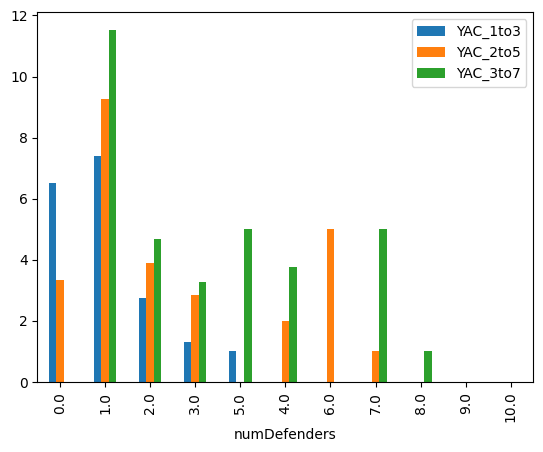

In [105]:
avgYAC.plot(x="numDefenders", y=["YAC_1to3", "YAC_2to5", "YAC_3to7"], kind="bar")

In [106]:
avgYAC.to_csv("avgYAC.csv")

In [61]:
merged_data = pd.concat([
    avgYAC_zone1to3.assign(Category = 'tackleZone_1to3'),
    avgYAC_zone2to5.assign(Category = 'tackleZone_2to5'),
    avgYAC_zone3to7.assign(Category = 'tackleZone_3to7'),
    avgYAC_zone5to10.assign(Category = 'tackleZone_5to10')
])

In [64]:
merged_data.to_csv('mergedData.csv')

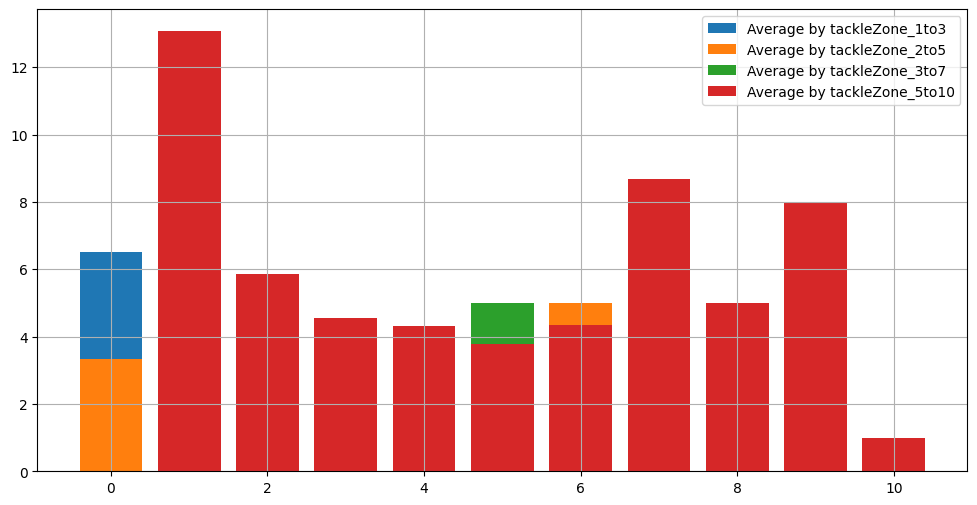

In [63]:
plt.figure(figsize=(12,6))
for category, group in merged_data.groupby('Category'):
    plt.bar(group[category], group['YAC'], label=f'Average by {category}')
plt.grid(True)
plt.legend()
plt.show()

<Axes: >

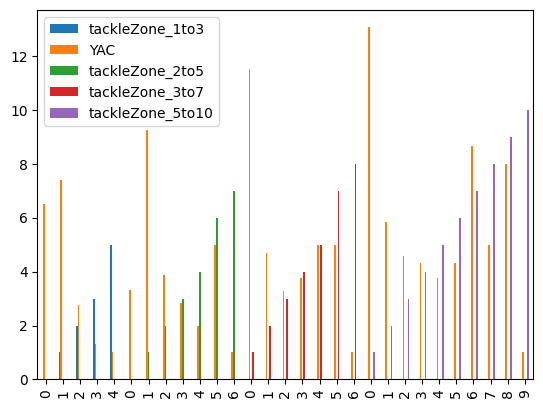

In [65]:
merged_data.plot.bar()

In [67]:
merged_data.head(10)

,tackleZone_1to3,YAC,Category,tackleZone_2to5,tackleZone_3to7,tackleZone_5to10
0,0.0,6.526316,tackleZone_1to3,NaN,NaN,NaN
1,1.0,7.395095,tackleZone_1to3,NaN,NaN,NaN
2,2.0,2.756458,tackleZone_1to3,NaN,NaN,NaN
3,3.0,1.300000,tackleZone_1to3,NaN,NaN,NaN
4,5.0,1.000000,tackleZone_1to3,NaN,NaN,NaN
0,NaN,3.333333,tackleZone_2to5,0.0,NaN,NaN
1,NaN,9.252475,tackleZone_2to5,1.0,NaN,NaN
2,NaN,3.881402,tackleZone_2to5,2.0,NaN,NaN
3,NaN,2.833333,tackleZone_2to5,3.0,NaN,NaN
4,NaN,2.000000,tackleZone_2to5,4.0,NaN,NaN
